# Classification Algorithms, Evaluation & Tuning

In this notebook, we will cover:

* Logistic Regression
* Confusion Matrix
* Precision, Recall, Accuracy, F1 Score
* ROC AUC Curve
* Deciding Binary Classifier threshold
* KNN
* Decision Tree Classifier
* Random Forest Classifier
* XGBoost Classifier
* Hyperparameter Tuning by GridSearchCV

Importing all necessary packages

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_recall_curve, precision_score, accuracy_score
from sklearn.metrics import recall_score, classification_report, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

Setting global seed of notebook

In [64]:
# generating random, but we define starting point by giving seed, so it will be same on other systems as well.
np.random.seed(seed=25)

### Loading Data

In [65]:
data = pd.read_csv('titanic_clean.csv')
df = data.copy()
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,2,2
1,1,1,0,38.0,1,0,71.2833,0,3
2,1,3,0,26.0,0,0,7.9250,2,1
3,1,1,0,35.0,1,0,53.1000,2,3
4,0,3,1,35.0,0,0,8.0500,2,2


In [66]:
# survived is categorical
X = df.drop('Survived', axis=1)
Y = df['Survived']

### Train Test Split

In [71]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(623, 8) (623,)
(268, 8) (268,)


# 1. Logistic Regression

### Creating Model & Training

In [72]:
clf_lr = LogisticRegression()

In [73]:
clf_lr.fit(xtrain, ytrain) # traning

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Evaluation

Predicting binary classifier

In [75]:
lr_pred = clf_lr.predict(xtest)

In [79]:
lr_pred[0:9]    # Computes the prob and then check if it's below or above 0.5. if > 0.5 then 1 else if < 0.5 then 0.

array([1, 0, 0, 1, 1, 0, 0, 0, 1])

Predicting prabability of **0** and **1**

In [80]:
lr_pred_prb = clf_lr.predict_proba(xtest)

In [82]:
lr_pred_prb[0:9,0:9]           # gives an nested array, 1st value in array is the prob of becomming 0 and 2nd is pob of becomming 1.

array([[0.30665417, 0.69334583],
       [0.83652249, 0.16347751],
       [0.61834133, 0.38165867],
       [0.38695348, 0.61304652],
       [0.06148671, 0.93851329],
       [0.88051055, 0.11948945],
       [0.88492728, 0.11507272],
       [0.91164354, 0.08835646],
       [0.34467174, 0.65532826]])

First value in Numpy array is probability of **0** and second is probability of **1**

Only predicting and extracting probability values of **1**

In [85]:
lr_pred_prb = clf_lr.predict_proba(xtest)[:,1]           # we need 2nd column because we pick data whose pob is becomming 1.

### Comparison of Predicted and Actual

In [87]:
xtest.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
172,3,0,1.0,1,1,11.1333,2,1
217,2,1,42.0,1,0,27.0000,2,2
124,1,1,54.0,0,1,77.2875,2,2
550,1,1,17.0,0,2,110.8833,0,2
539,1,0,22.0,0,2,49.5000,0,1


In [88]:
xt = xtest.copy()
xt['pred'] = lr_pred
xt['pred_probability'] = lr_pred_prb
xt['actual'] = ytest
xt.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,pred,pred_probability,actual
172,3,0,1.0,1,1,11.1333,2,1,1,0.693346,1
217,2,1,42.0,1,0,27.0000,2,2,0,0.163478,0
124,1,1,54.0,0,1,77.2875,2,2,0,0.381659,0
550,1,1,17.0,0,2,110.8833,0,2,1,0.613047,1
539,1,0,22.0,0,2,49.5000,0,1,1,0.938513,1


### Confusion Matrix

In [94]:
confusion_matrix(xt['actual'], xt['pred']).ravel()

array([153,  18,  31,  66])

In [95]:
tn, fp, fn, tp = confusion_matrix(xt['actual'], xt['pred']).ravel()
conf_matrix=pd.DataFrame({"pred_Not Survived":[tn,fn],"pred_Survived":[fp,tp]},index=["Not Survived","Survived"])
conf_matrix

,pred_Not Survived,pred_Survived
Not Survived,153,18
Survived,31,66


### Accuracy

In [96]:
accuracy = (tp + tn) / (tp + fp + tn + fn)
print("Accuracy: {}".format(accuracy))

Accuracy: 0.8171641791044776


In [97]:
accuracy_lr = accuracy_score(ytest,lr_pred)
print("Accuracy by built-in function: {}".format(accuracy_lr))

Accuracy by built-in function: 0.8171641791044776


### Precision

In [98]:
precision_1 = tp / (tp + fp)
print("Precision for 1: {}".format(precision_1))
precision_0 = tn / (tn + fn)
print("Precision for 0: {}".format(precision_0))

Precision for 1: 0.7857142857142857
Precision for 0: 0.8315217391304348


In [99]:
precision_lr = precision_score(ytest,lr_pred)
print("Precision by built-in function: {}".format(precision_lr))

Precision by built-in function: 0.7857142857142857


### Recall

In [100]:
recall_1 = tp / (tp + fn)
print("Recall for 1: {}".format(recall_1))
recall_0 = tn / (tn + fp)
print("Recall for 0: {}".format(recall_0))

Recall for 1: 0.6804123711340206
Recall for 0: 0.8947368421052632


In [101]:
recall_lr = recall_score(ytest,lr_pred)
print("Recall by built-in function: {}".format(recall_lr))

Recall by built-in function: 0.6804123711340206


### F1 Score

In [102]:
f1_1 = (2 * precision_1 * recall_1) / (precision_1 + recall_1)
print("F1 Score for 1: {}".format(f1_1))
f1_0 = (2 * precision_0 * recall_0) / (precision_0 + recall_0)
print("F1 Score for 0: {}".format(f1_0))

F1 Score for 1: 0.729281767955801
F1 Score for 0: 0.8619718309859156


In [103]:
f1_lr=f1_score(ytest,lr_pred)
print("F1 Score by built-in function: {}".format(f1_lr))

F1 Score by built-in function: 0.729281767955801


### Class Distribution in Training Data

In [24]:
ytrain.value_counts()

0    384
1    239
Name: Survived, dtype: int64

### Classification Report

In [25]:
print(classification_report(ytest,lr_pred))

             precision    recall  f1-score   support

          0       0.80      0.85      0.82       165
          1       0.73      0.66      0.69       103

avg / total       0.77      0.78      0.77       268



### ROC AUC Curve

_Receiver Operating Characteristic_ & _Area Under Curve_

In [26]:
tpr = recall_lr
fpr = fp / (fp + tn)

In [27]:
tpr, fpr

(0.6601941747572816, 0.15151515151515152)

In [28]:
fpr = 1 - recall_0
tpr, fpr

(0.6601941747572816, 0.1515151515151515)

Defining function to plot ROC AUC Curve

In [29]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='best')

Getting TPR, FPR values for each threshold on ROC AUC Curve

In [30]:
fpr,tpr,threshold=roc_curve(ytest,lr_pred_prb)

Calculating AUC score from ytest and predicted probabilities

In [31]:
auc_lr=roc_auc_score(ytest,lr_pred_prb)
auc_lr

0.848720211827008

Plotting AUC ROC Curve

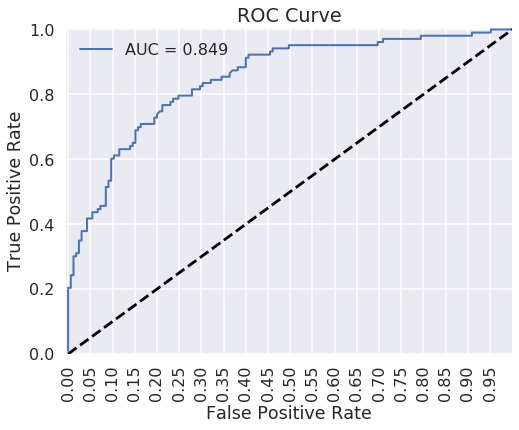

In [32]:
sns.set_context('poster')
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_lr)

### Deciding Binary Classifier threshold based on Confusion Matrix (reducing Type-1 or Type-2 Error)

Defining function for adjusted binary classification based on threshold

In [33]:
def adjusted_classes(pred_prob, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in pred_prob]

Defining function for precision and recall curve

In [34]:
def precision_recall_threshold(p, r, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    pred_adj = adjusted_classes(lr_pred_prb, t)
    tn, fp, fn, tp = confusion_matrix(ytest, pred_adj).ravel()
    print(pd.DataFrame({"pred_Survived":[tp,fp],"pred_Not Survived":[fn,tn]},index=["Survived","Not Survived"]))
    
    print("\n Accuracy: ",(tp+tn)/(tn+fp+fn+tp)*100)
    
    # plot the curve
    plt.figure(figsize=(8,6))
    plt.title("Precision and Recall curve at current threshold")
    plt.step(r, p, color='b', alpha=0.2,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.2,
                     color='b')
    plt.ylim([-0.01, 1.01]);
    plt.xlim([-0.01, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k',
            markersize=15)

Defining function to plot precision and recall relation with decision threshold

In [35]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds,line=0.5):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 6))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.axvline(x=line)
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

Calculating precision, recall and thresholds for Precision-Recall Curve

In [36]:
p , r , thresholds = precision_recall_curve(ytest,lr_pred_prb)

Ploting Precsion and Recall vs Threshold

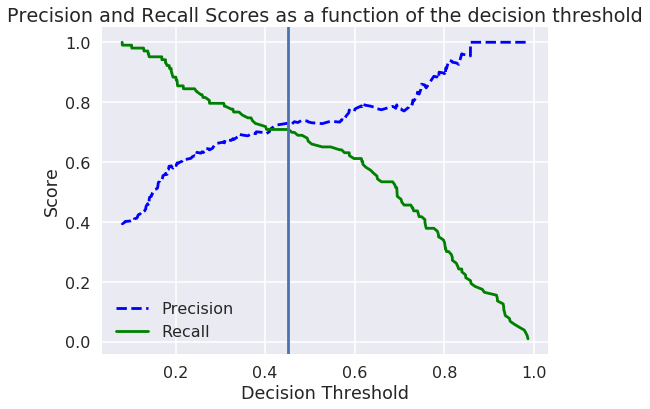

In [37]:
plot_precision_recall_vs_threshold(p,r,thresholds,line=0.45)

Decision Threshold based on Domain knowledge (reducing False Negative)

              pred_Survived  pred_Not Survived
Survived                103                  0
Not Survived            163                  2

 Accuracy:  39.17910447761194


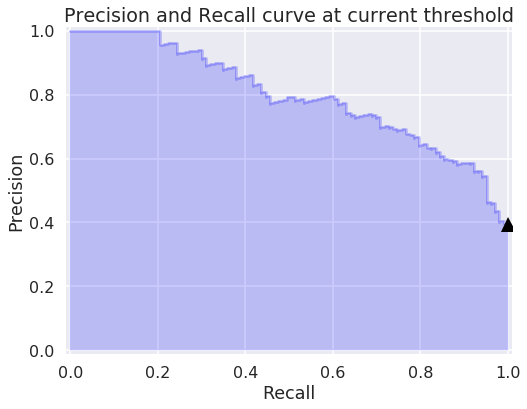

In [38]:
precision_recall_threshold(p,r,thresholds,0.05)

# 2. K Nearest Neighbors (KNN)

In [39]:
X = df.drop('Survived', axis=1)
Y = df['Survived']

Train Test Split

In [40]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(623, 8) (623,)
(268, 8) (268,)


For KNN, we need to stadardize data first

In [41]:
from sklearn.preprocessing import StandardScaler 

In [42]:
scaler = StandardScaler()  
scaler.fit(xtrain)
X_train_=scaler.transform(xtrain)
X_test_=scaler.transform(xtest)
X_train=pd.DataFrame(data=X_train_, columns=xtrain.columns)
X_test=pd.DataFrame(data=X_test_, columns=xtest.columns)

In [43]:
clf_knn = KNeighborsClassifier(n_neighbors=4)

In [44]:
clf_knn.fit(X_train,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [45]:
knn_pred=clf_knn.predict(X_test)
knn_pred_prb=clf_knn.predict_proba(X_test)[:,1]

In [46]:
accuracy_knn = accuracy_score(ytest,knn_pred)
print("Accuracy : {}".format(accuracy_knn))

Accuracy : 0.8134328358208955


In [47]:
print(classification_report(ytest,knn_pred))

             precision    recall  f1-score   support

          0       0.81      0.89      0.85       160
          1       0.82      0.69      0.75       108

avg / total       0.81      0.81      0.81       268



In [48]:
fpr,tpr,threshold=roc_curve(ytest,knn_pred_prb)

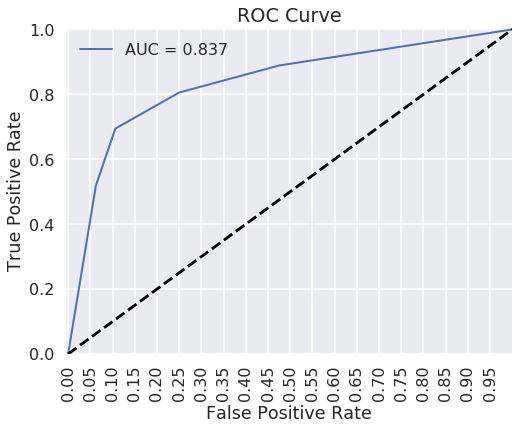

In [49]:
sns.set_context('poster')
auc_knn=roc_auc_score(ytest,knn_pred_prb)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_knn)

# 3. Decision Tree Classifier

In [50]:
X = df.drop('Survived', axis=1)
Y = df['Survived']

### Train Test Split

In [51]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(623, 8) (623,)
(268, 8) (268,)


Defining Decision Tree classifier

In [52]:
clf_dt = DecisionTreeClassifier(criterion='gini',max_depth=3)

In [53]:
clf_dt.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [54]:
dt_pred = clf_dt.predict(xtest)
dt_pred_prb=clf_dt.predict_proba(xtest)[:,1]

In [55]:
accuracy_dt = accuracy_score(ytest,dt_pred)
print("Accuracy: {}".format(accuracy_dt))

Accuracy: 0.832089552238806


In [56]:
print(classification_report(ytest,dt_pred))

             precision    recall  f1-score   support

          0       0.85      0.89      0.87       171
          1       0.80      0.72      0.76        97

avg / total       0.83      0.83      0.83       268



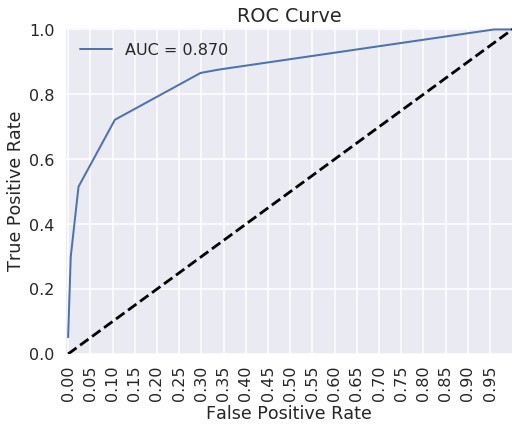

In [57]:
sns.set_context('poster')
auc_dt=roc_auc_score(ytest,dt_pred_prb)
fpr,tpr,threshold=roc_curve(ytest,dt_pred_prb)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_dt)

### Ploting Decision Tree

Loading packages

In [58]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

Download Graphviz 2.38 from this [link](https://graphviz.gitlab.io/_pages/Download/Download_windows.html) and install. Then run below line as per your intallation path. (This step is one time)

In [59]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'

In [60]:
dot_data = StringIO()

In [61]:
export_graphviz(clf_dt, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=list(X.columns))

In [62]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [63]:
Image(graph.create_png())

InvocationException: GraphViz's executables not found

Exporting PNG file of Decision Trees

In [ ]:
graph.write_png('Decision Tree_Titanic.png')

### Features Importance

In [ ]:
features_tuple=list(zip(X.columns,clf_dt.feature_importances_))

In [ ]:
feature_imp=pd.DataFrame(features_tuple,columns=["Feature Names","Importance"])

In [ ]:
feature_imp=feature_imp.sort_values("Importance",ascending=False)

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x="Feature Names",y="Importance", data=feature_imp, color='b')
plt.xlabel("Titanic Features")
plt.ylabel("Importance")
plt.title("Decision Classifier - Features Importance")

# 3. Random Forest

In [ ]:
X = df.drop('Survived', axis=1)
Y = df['Survived']

Train Test Split

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

Defining Random Forest classifier

In [ ]:
clf_rf = RandomForestClassifier(max_depth=4)

In [ ]:
clf_rf.fit(xtrain, ytrain)

In [ ]:
rf_pred = clf_rf.predict(xtest)
rf_pred_prb=clf_rf.predict_proba(xtest)[:,1]

In [ ]:
accuracy_rf = accuracy_score(ytest,rf_pred)
print("Accuracy: {}".format(accuracy_rf))

In [ ]:
print(classification_report(ytest,rf_pred))

In [ ]:
auc_rf=roc_auc_score(ytest,rf_pred_prb)
fpr,tpr,threshold=roc_curve(ytest,rf_pred_prb)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_rf)

### Ploting Random Forest

Loading packages

In [ ]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

Download Graphviz 2.38 from this [link](https://graphviz.gitlab.io/_pages/Download/Download_windows.html) and install. Then run below line as per your intallation path. (This step is one time)

In [ ]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'

In [ ]:
dot_data = StringIO()

In [ ]:
tree = clf_rf.estimators_[9]

In [ ]:
export_graphviz(tree, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=list(X.columns))

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [ ]:
Image(graph.create_png())

Exporting PNG file of Decision Trees

In [ ]:
graph.write_png('Random Forest_Titanic.png')

### Features Importance

In [ ]:
features_tuple=list(zip(X.columns,clf_rf.feature_importances_))

In [ ]:
feature_imp=pd.DataFrame(features_tuple,columns=["Feature Names","Importance"])

In [ ]:
feature_imp=feature_imp.sort_values("Importance",ascending=False)

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x="Feature Names",y="Importance", data=feature_imp, color='b')
plt.xlabel("Titanic Features")
plt.ylabel("Importance")
plt.title("Random Forest Classifier - Features Importance")

### Hyperparameter Tuning using GridSearchCV

Importing GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

Making grid of parameters and running GridSearch CV

In [ ]:
param_grid1 = {"n_estimators" : [9, 18, 27, 36, 45, 54, 63],
           "max_depth" : [1, 5, 10, 15, 20, 25, 30],
           "min_samples_leaf" : [1, 2, 4, 6, 8, 10]}

RF = RandomForestClassifier()
# Instantiate the GridSearchCV object: logreg_cv
RF_cv1 = GridSearchCV(RF, param_grid1, cv=5,scoring='roc_auc',n_jobs=4)

# Fit it to the data
RF_cv1.fit(xtrain,ytrain)

RF_cv1.grid_scores_, RF_cv1.best_params_, RF_cv1.best_score_

So we found **'max_depth': 30, 'min_samples_leaf': 2, 'n_estimators': 45** as optimum parameters

Let's try new set of parameter values near to optimum.

In [ ]:
param_grid2 = {"n_estimators" : [35,40,45,50,55,60],
           "max_depth" : [30,32,34,36,38],
           "min_samples_leaf" : [1,2,3]}

RF = RandomForestClassifier()
# Instantiate the GridSearchCV object: logreg_cv
RF_cv2 = GridSearchCV(RF, param_grid2, cv=5,scoring='roc_auc',n_jobs=4)

# Fit it to the data
RF_cv2.fit(xtrain,ytrain)

RF_cv2.grid_scores_, RF_cv2.best_params_, RF_cv2.best_score_

 So we found **'max_depth': 30, 'min_samples_leaf': 2, 'n_estimators': 55** as optimum parameters

### Tuned Random Forest

In [ ]:
RF_tuned = RandomForestClassifier(max_depth=30, min_samples_leaf=2, n_estimators=55)

In [ ]:
RF_tuned.fit(xtrain, ytrain)

In [ ]:
rf_pred_t = RF_tuned.predict(xtest)
rf_pred_prb_t=RF_tuned.predict_proba(xtest)[:,1]

In [ ]:
accuracy_rf_t = accuracy_score(ytest,rf_pred_t)
print("Accuracy affter tuning: {}".format(accuracy_rf_t))

In [ ]:
print(classification_report(ytest,rf_pred_t))

In [ ]:
auc_rf_t=roc_auc_score(ytest,rf_pred_prb_t)
fpr,tpr,threshold=roc_curve(ytest,rf_pred_prb_t)
plot_roc_curve(fpr,tpr,label='AUC Tuned = %0.3f'% auc_rf_t)

Comparing Random Forest before and after Hyperparameters tuning.

In [ ]:
RF_dict = {"Algorithm":["Random Forest","Random Forest"],"Action":["First Run","Tuned"],
           "Accuracy":[accuracy_rf,accuracy_rf_t],"AUC":[auc_rf,auc_rf_t]}

In [ ]:
comparison=pd.DataFrame(RF_dict)
comparison

In [ ]:
print("Difference in Accuracy is: %0.3f"%((comparison.loc[1,'Accuracy']-comparison.loc[0,'Accuracy'])*100))
print("Difference in AUC is: %0.3f"%((comparison.loc[1,'AUC']-comparison.loc[0,'AUC'])*100))

AWESOME! Isn't it? :D

# 5. XGBoost

In [ ]:
X = df.drop('Survived', axis=1)
Y = df['Survived']

Train Test Split

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

Extreme Gradient Boosting Algorithm

In [ ]:
clf_xgb = xgb.XGBClassifier(seed=25,nthread=1)

In [ ]:
clf_xgb.fit(xtrain, ytrain)

In [ ]:
xgb_pred = clf_xgb.predict(xtest)
xgb_pred_prb=clf_xgb.predict_proba(xtest)[:,1]

In [ ]:
accuracy_xgb = accuracy_score(ytest,xgb_pred)
print("Accuracy: {}".format(accuracy_xgb))

In [ ]:
print(classification_report(ytest,xgb_pred))

In [ ]:
auc_xgb=roc_auc_score(ytest,xgb_pred_prb)
fpr,tpr,threshold=roc_curve(ytest,xgb_pred_prb)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_xgb)

### Built-in Cross Validation

XGBoost has built-in cross validation and it uses training data as DMatrix input. DMatrix is a XGBoost internal class.

Creating DMatrix of training data

In [ ]:
dtrain = xgb.DMatrix(data=xtrain, label=ytrain)

Extracting existing XGBoost classifier parameters

In [ ]:
xgb_param=clf_xgb.get_params()

Running cross validation and saving results as pandas dataframe in **cv_result**

In [ ]:
cv_result=xgb.cv(xgb_param,dtrain,num_boost_round=100,nfold=5,metrics={'auc'},early_stopping_rounds=10,seed=25)

In [ ]:
cv_result

We can see that num_boost_rounds were 100 but due to early stopping, total 8 trees have been made to calculate best test-auc-mean

### Hyperparameters Tunung using GridSearchCV

Tuning Hyperparametrs of XGBoost

The various steps to be performed for tuning are:

* Choose a relatively high learning rate. Generally a learning rate of 0.1 works but somewhere between 0.05 to 0.3 should work for different problems. Determine the optimum number of trees for this learning rate. XGBoost has a very useful function called as “cv” which performs cross-validation at each boosting iteration and thus returns the optimum number of trees required.
* Tune tree-specific parameters ( max_depth, min_child_weight, gamma, subsample, colsample_bytree) for decided learning rate and number of trees.
* Tune regularization parameters (lambda, alpha) for xgboost which can help reduce model complexity and enhance performance.
* Lower the learning rate and decide the optimal parameters .

Making function for modelfit with cross validation

In [ ]:
def modelfit(alg, dtrain, xtrain, xtest, ytrain, ytest,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param=alg.get_params()
        cv_result=xgb.cv(xgb_param,dtrain,num_boost_round=alg.get_params()['n_estimators'],nfold=cv_folds,metrics={'auc'},
                     early_stopping_rounds=early_stopping_rounds,seed=25)
        alg.set_params(n_estimators=cv_result.shape[0])
        print("n_estimators : ",alg.get_params()['n_estimators'])
    
    #fit algorithm on data
    alg.fit(xtrain,ytrain)
    pred=alg.predict(xtest)
    predprob=alg.predict_proba(xtest)[:,1]
    
    print ("\nModel Report")
    print ("Accuracy(Test) : %.4g" % accuracy_score(ytest, pred))
    print ("AUC Score(Test) : %f" % roc_auc_score(ytest, predprob))

Defining model wil default parameters

In [ ]:
xgb1=xgb.XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=25)

**Fix learning rate and number of estimators for tuning tree-based parameters**

In [ ]:
modelfit(xgb1,dtrain, xtrain, xtest,ytrain,ytest)

As you can see that here we got 4 as the optimal estimators for 0.1 learning rate.

**Tune max_depth and min_child_weight**

We tune these first as they will have the highest impact on model outcome. To start with, let’s set wider ranges and then we will perform another iteration for smaller ranges.

In [ ]:
param_test1 = {
 'max_depth':range(3,11,2),
 'min_child_weight':range(0,9,2)
}

gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=4, max_depth=5,
 min_child_weight=1, gamma=0.0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=25), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch1.fit(xtrain,ytrain)

gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

Here, we have run 20 combinations with wider intervals between values. The ideal values are **5 for max_depth** and **0 for min_child_weight**. Lets go one step deeper and look for optimum values. We’ll search for values 1 above and below the optimum values because we took an interval of two.

In [ ]:
param_test2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[0,1,2]
}

gsearch2 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=4, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=25), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch2.fit(xtrain,ytrain)

gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

 So, optimum value of **max_depth is 5** and **min_child_weight is 1**

**Tune gamma**

Now lets tune gamma value using the parameters already tuned above. Gamma can take various values but I’ll check for 7 values here.

In [ ]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,7)]
}

gsearch3 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=4, max_depth=15,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=42), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch3.fit(xtrain,ytrain)

gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

So gamma optimum value which is **0.6**

Before proceeding, a good idea would be to re-calibrate the number of boosting rounds for the updated parameters.

In [ ]:
xgb2=xgb.XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0.6,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=25)

In [ ]:
modelfit(xgb1,dtrain, xtrain, xtest,ytrain,ytest)

n_estimators is still **4**

So the final parameters are:

* max_depth: 5
* min_child_weight: 1
* gamma: 0.6

**Tune subsample and colsample_bytree**

The next step would be try different subsample and colsample_bytree values. Lets do this in 2 stages as well and take values 0.6,0.7,0.8,0.9 for both to start with.

In [ ]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,11)],
 'colsample_bytree':[i/10.0 for i in range(6,11)]
}

gsearch4 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=4, max_depth=15,
 min_child_weight=1, gamma=0.6, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=25), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch4.fit(xtrain,ytrain)

gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

Here, we found **0.8 and 0.9 as the optimum value** for both subsample and colsample_bytree. Now we should try values in 0.05 interval around these.

In [ ]:
param_test5 = {
 'subsample':[i/100.0 for i in range(85,100,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}

gsearch5 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=4, max_depth=5,
 min_child_weight=1, gamma=0.6, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=25), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch5.fit(xtrain,ytrain)

gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

Thus the optimum values are:

* subsample: 0.9
* colsample_bytree: 0.75

**Tuning Regularization Parameters**

Next step is to apply regularization to reduce overfitting.We will tune ‘reg_alpha’.

In [ ]:
param_test6 = {
 'reg_alpha':[0.1, 1, 2,0,5,10,20,50,100]
}

gsearch6 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=4, max_depth=5,
 min_child_weight=1, gamma=0.6, subsample=0.9, colsample_bytree=0.75,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=25), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch6.fit(xtrain,ytrain)

gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

so after iterations, **reg_alpha is optimum at 1**.

**Reducing Learning Rate**

In [ ]:
xgb3=xgb.XGBClassifier(learning_rate =0.01,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0.6,
 subsample=0.9,
 colsample_bytree=0.75,
 reg_alpha=1,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=25)

In [ ]:
modelfit(xgb3,dtrain, xtrain, xtest, ytrain, ytest)

### Tuned XGBoost

Hence final parameters are:

* n_estimators = 4
* learning rate = 0.01
* max_depth = 5
* min_child_weight = 1
* gamma = 0.6
* subsample = 0.9
* colsample_bytree = 0.75
* reg_alpha = 1

In [ ]:
xgb4=xgb.XGBClassifier(learning_rate =0.01,
 n_estimators=4,
 max_depth=5,
 min_child_weight=1,
 gamma=0.6,
 subsample=0.9,
 colsample_bytree=0.75,
 reg_alpha=1,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=25)

In [ ]:
xgb4.fit(xtrain, ytrain)

In [ ]:
xgb_pred_t = xgb4.predict(xtest)
xgb_pred_prb_t = xgb4.predict_proba(xtest)[:,1]

In [ ]:
accuracy_xgb_t = accuracy_score(ytest,xgb_pred_t)
print("Accuracy: {}".format(accuracy_xgb_t))

In [ ]:
print(classification_report(ytest,xgb_pred_t))

In [ ]:
auc_xgb_t=roc_auc_score(ytest,xgb_pred_prb_t)
fpr,tpr,threshold=roc_curve(ytest,xgb_pred_prb_t)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_xgb_t)